### Heart Attack Prediction

### Importing Libraries 

In [80]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt 
import seaborn as sns 

import numpy as np

### Reading the database

In [82]:
cleveland_df = pd.read_csv('processed_cleveland.csv', na_values='?')
cleveland_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### Data Cleaning 

In [84]:
cleveland_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [85]:
cleveland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


### Looking for null values

In [87]:
cleveland_df.isnull()
cleveland_df.replace('?', np.nan, inplace= True)

cleveland_df['ca'] = pd.to_numeric(cleveland_df['ca'])
cleveland_df['thal'] = pd.to_numeric(cleveland_df['thal'])
cleveland_df.dropna(inplace=True)

In [88]:
cleveland_df.isnull().values.any()

False

In [89]:
print(cleveland_df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


### One-Hot Encoding to fit Logistic Regression

In [91]:
cleveland_df['target'] = cleveland_df['num'].apply(lambda x: 1 if x > 0 else 0)
cleveland_df.drop('num', axis=1, inplace=True)

In [92]:
category_cols = ['cp', 'restecg', 'slope', 'thal']

In [93]:
clevelanddf_encoded = pd.get_dummies(cleveland_df, columns=category_cols, drop_first=True)
X = clevelanddf_encoded.drop('target', axis=1)
y = clevelanddf_encoded['target']

In [94]:
print(clevelanddf_encoded.head())

   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak   ca  target   cp_2  \
0   63    1       145   233    1      150      0      2.3  0.0       0  False   
1   67    1       160   286    0      108      1      1.5  3.0       1  False   
2   67    1       120   229    0      129      1      2.6  2.0       1  False   
3   37    1       130   250    0      187      0      3.5  0.0       0  False   
4   41    0       130   204    0      172      0      1.4  0.0       0   True   

    cp_3   cp_4  restecg_1  restecg_2  slope_2  slope_3  thal_6.0  thal_7.0  
0  False  False      False       True    False     True      True     False  
1  False   True      False       True     True    False     False     False  
2  False   True      False       True     True    False     False      True  
3   True  False      False      False    False     True     False     False  
4  False  False      False       True    False    False     False     False  


### Splitting the Data into a Train_Test Split

In [96]:
 X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [97]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (237, 18)
Test set size: (60, 18)


### Model Training

In [99]:
model = LogisticRegression(max_iter=1000)

In [100]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [101]:
y_pred = model.predict(X_test)

### Model Evaluation

In [103]:
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60

ROC AUC Score: 0.9497767857142857


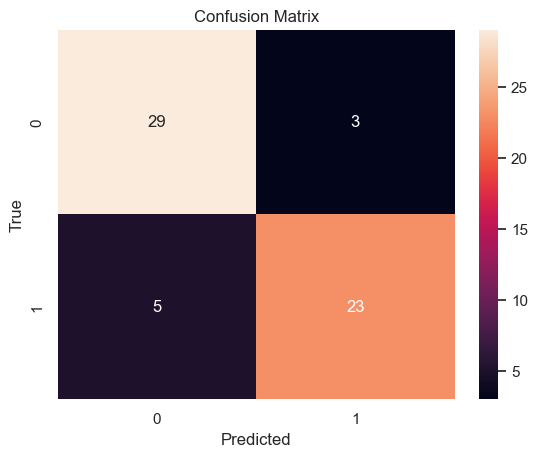

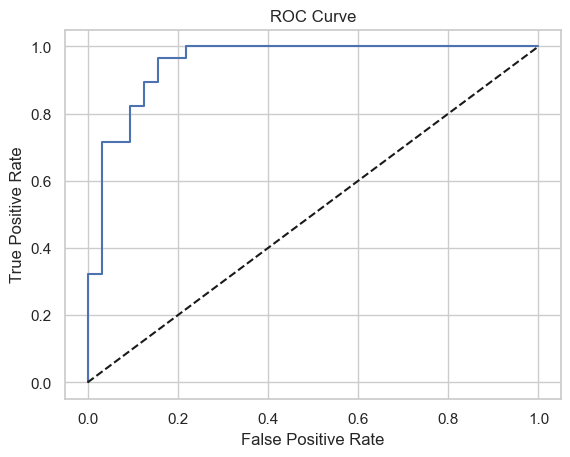

In [104]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Data Analysis

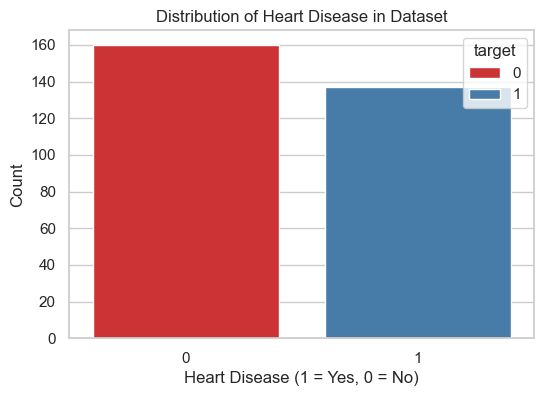

In [106]:

sns.set(style="whitegrid")


plt.figure(figsize=(6,4))
sns.countplot(x='target', data=cleveland_df, palette='Set1', hue = 'target' )
plt.title('Distribution of Heart Disease in Dataset')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

In [107]:
print("Target value counts:")
print(cleveland_df['target'].value_counts())

Target value counts:
target
0    160
1    137
Name: count, dtype: int64


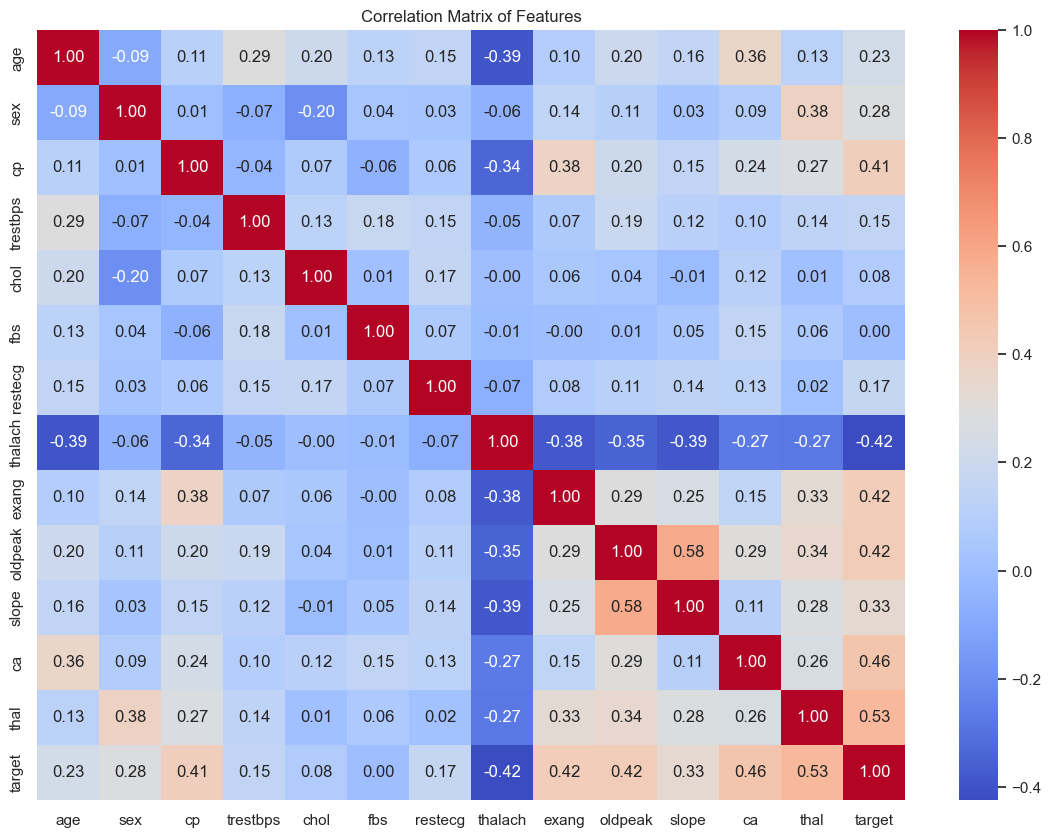

In [108]:
plt.figure(figsize=(14,10))
corr_matrix = cleveland_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

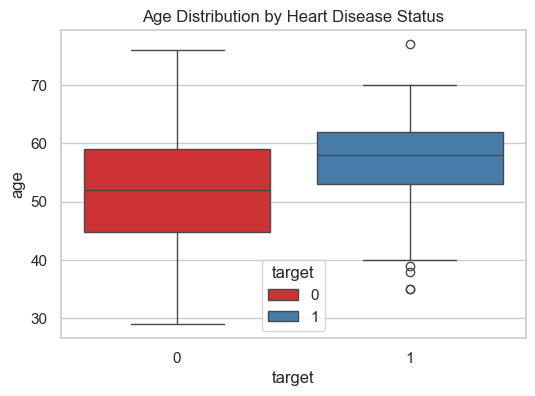

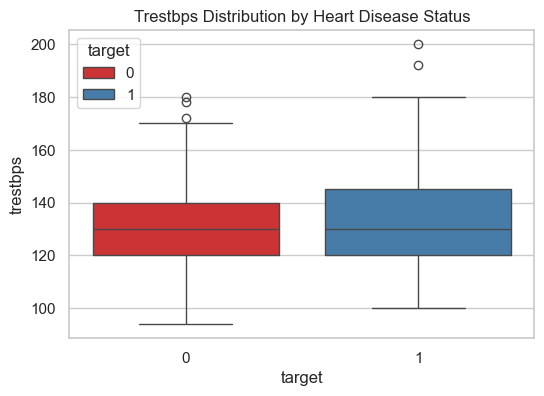

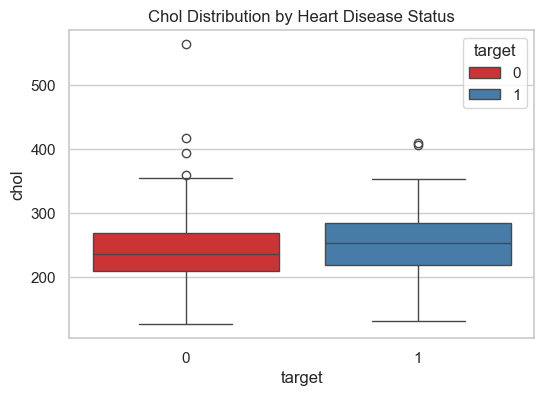

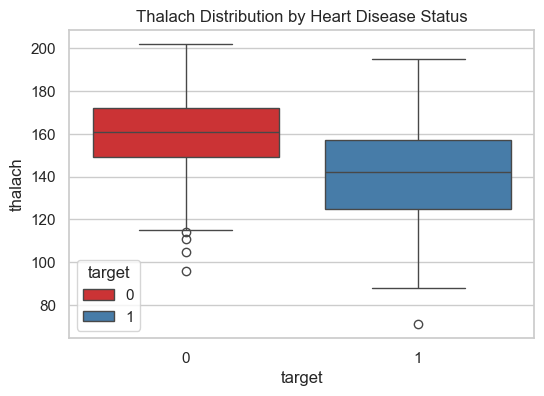

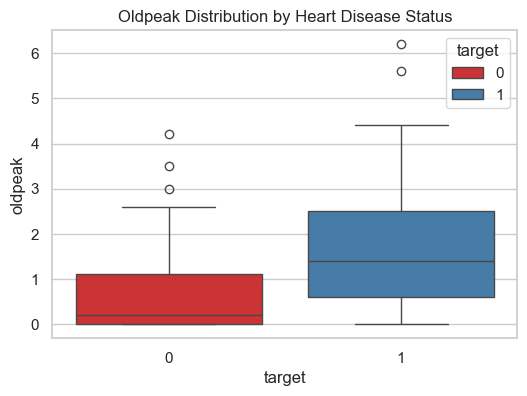

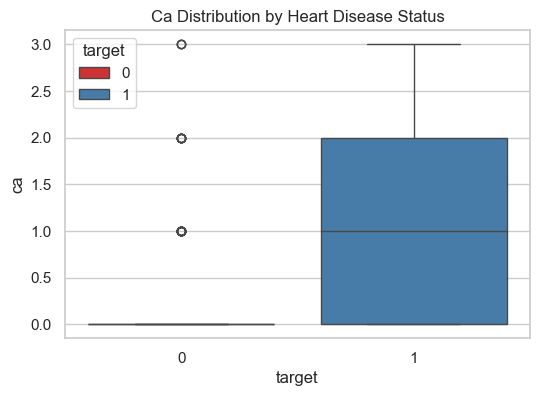

In [109]:
features_to_plot = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='target', y=feature, data=cleveland_df, palette='Set1', hue = 'target')
    plt.title(f'{feature.capitalize()} Distribution by Heart Disease Status')
    plt.show()

In [110]:
print("\nSummary Statistics:")
display(cleveland_df.describe())


Summary Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


### Testing the model

In [112]:
new_patient = {
    'age': 35,
    'sex': 1,
    'trestbps': 70,
    'chol': 500,
    'fbs': 0,
    'thalach': 135,
    'exang': 0,
    'oldpeak': 1.5,
    'ca': 0.0,
    'cp_2': 0,      
    'cp_3': 0,
    'cp_4': 1,
    'restecg_1': 0,
    'restecg_2': 1,
    'slope_2': 1,
    'slope_3': 0,
    'thal_6.0': 0,
    'thal_7.0': 1
}


new_patient_df = pd.DataFrame([new_patient])

new_patient_df[numeric_cols] = scaler.transform(new_patient_df[numeric_cols])

prediction = model.predict(new_patient_df)
print("Prediction (0 = no disease, 1 = heart disease):", prediction)

Prediction (0 = no disease, 1 = heart disease): [1]
